# Developing a Composite Measure: Restfulness
### Erica Yee / IS4800

## Identifying factors
Restfulness is an important factor in the lives of college students that goes beyond the amount of sleep one gets. College students "suffer a decreased level of sleep quality compared with a 'normal' adult population” (__[Buboltz, et al 2001](https://www.researchgate.net/publication/11593058_Sleep_Habits_and_Patterns_of_College_Students_A_Preliminary_Study)__). Research has also shown that irregular sleeping patterns may be linked with poorer academic performance in college students (__[Phillips et al 2017](https://www.nature.com/articles/s41598-017-03171-4)__). Accordingly, this study aims to measuring the degree to which a student feels rested through questions about various related habits and behaviors.

## Identifying items
The questionnaire includes nine items, with the first six comprising the composite measure. These six items required responses on a 5-point Likert scale: *(1) Strongly disagree, (2) Disagree, (3) Neither agree nor disagree, (4) Agree, (5) Strongly agree*.

The composite measure items appeared as follows, with respondents asked to rate each item on the 5-point scale. They were inspired by the __[Pittsburgh Sleep Quality Index](http://uacc.arizona.edu/sites/default/files/psqi_sleep_questionnaire_1_pg.pdf)__, a previously validated sleep assessment.
1. I find it difficult to get to sleep.
2. I go to bed at the same time every night.
3. I feel that I sleep enough every night.
4. My sleep is interrupted and disturbed.
5. I feel tired when I wake up.
6. I feel rested throughout the day.

The seventh item was an additional Likert scale item for survey validation purposes.
7. I regularly feel stressed.

Finally, there were two demographic items included for general information.
8. What is your age? *(short answer)*
9. What is your gender? *(Female/Male/Prefer not to say)*

## Face validity, content validity, and response variance
Before administration, the questionnaire was analyzed on several dimensions of validity. The analysis is presented in a table:
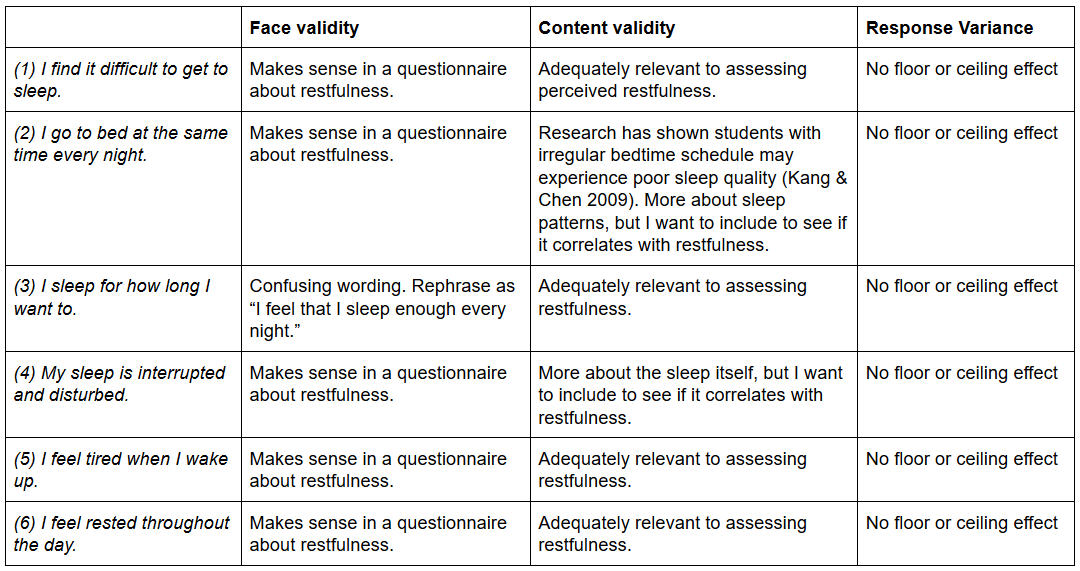

## Bivariate analysis
The purpose of bivariate analysis is to ensure every pair of items in the questionnaire are related, but not redundant. The analysis was as follows:
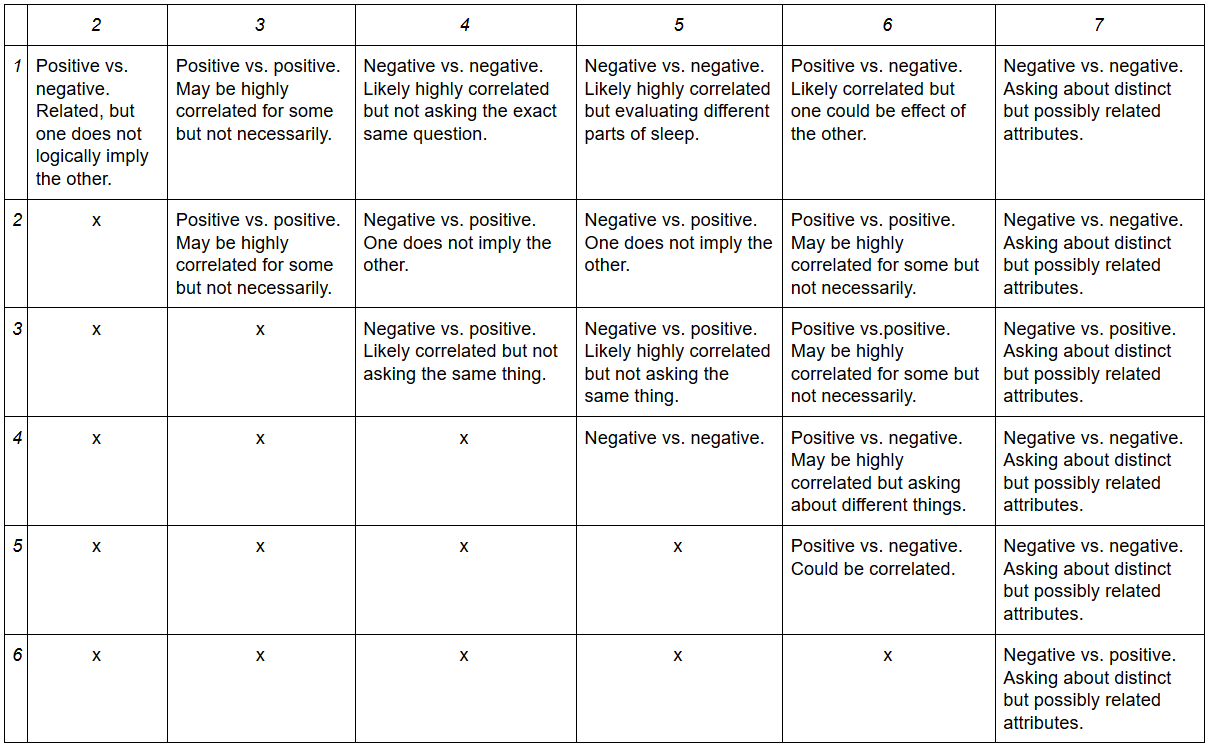

## Results
The questionnaire was administered online using __[Google Forms](https://docs.google.com/forms/d/e/1FAIpQLSda5eLa3hJF5rRy1jsgnNxq4uerv4ugZL6xcM5GFAYZdlyKXA/viewform?usp=sf_link)__.

#### import required libraries

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from scipy.stats import linregress

The results were as follows:

In [34]:
rest_data = pd.read_csv('data_neg_csv.csv')
print(rest_data)

    Q1  Q2  Q3  Q4  Q5  Q6  Q7  Age  Gender
0    5   3   1   5   1   1   3   20    Male
1    5   3   2   4   3   4   2   21    Male
2    2   2   1   1   2   2   2   28    Male
3    2   3   2   3   2   2   2   27  Female
4    4   4   2   5   3   2   2   20    Male
5    4   2   2   2   1   2   2   22  Female
6    3   1   3   3   2   2   2   22    Male
7    2   2   2   4   2   1   2   22    Male
8    4   2   1   5   1   2   2   20    Male
9    3   2   3   5   3   3   2   27  Female
10   5   2   1   2   3   2   4   23    Male
11   3   2   3   4   3   3   4   21    Male
12   3   2   4   4   2   4   5   22    Male
13   4   2   4   3   2   2   1   21    Male
14   2   2   2   4   1   2   1   21    Male
15   2   2   4   4   4   2   2   25  Female
16   2   2   1   2   2   2   2   23    Male


## Analysis of demographic data
There were 17 respondents, with an age range of 20 to 28. The results are positively skewed and not normally distributed, as evidenced in the histogram below: 

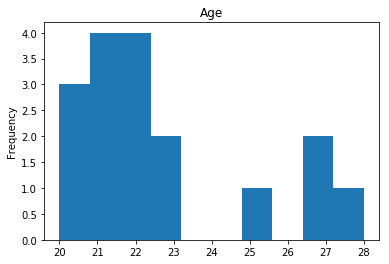

In [35]:
age = rest_data['Age']
plt.hist(age)
plt.ylabel('Frequency')
plt.title('Age')
plt.show()

In [36]:
age_med = age.median()
print(age_med)

age_iqr = age.quantile(0.75) - age.quantile(0.25)
print(age_iqr)

22.0
2.0


The median age is 22 and the interquartile range is 2.

Text(0.5,1,'Gender')

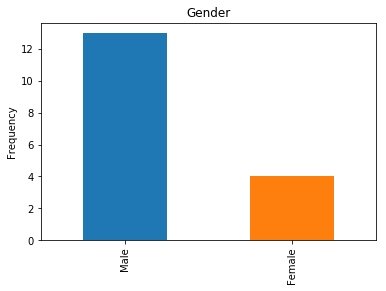

In [37]:
gen = rest_data['Gender']
gen_counts = gen.value_counts()
gen.value_counts().plot('bar')
plt.ylabel('Frequency')
plt.title('Gender')

There were 13 male (76 percent) and 4 female respondents (24 percent). The mode was male.

## Analysis of composite scores
The composite scores were calculated by negating the negative items and then summing up responses to the first six Likert items. The maximum possible score, intended to represent maximum degree of restfulness, is 30. The results are not normally distributed.

Text(0,0.5,'Frequency')

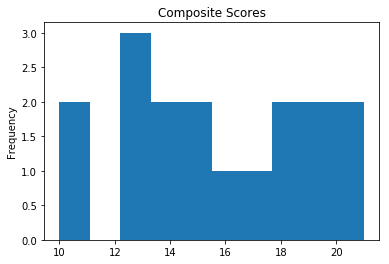

In [38]:
first_six = rest_data.loc[:, 'Q1':'Q6']
comps = first_six.sum(axis=1)

plt.hist(comps)
plt.title('Composite Scores')
plt.ylabel('Frequency')

In [39]:
comps_med = comps.median()
print(comps_med)

comps_iqr = comps.quantile(0.75) - comps.quantile(0.25)
print(comps_iqr)

15.0
5.0


The median of the composite scores is 15 and the interquartile range is 5.

## Testing reliability
Cronbach's Alpha was used to test reliability of the questionnaire through measuring internal consistency. Again, the first six items that comprise the composite measure were negated if reverse-coded and then analyzed.

In [40]:
def cronbach_alpha(items):
    items_count = items.shape[1]
    variance_sum = float(items.var(axis=0, ddof=1).sum())
    total_var = float(items.sum(axis=1).var(ddof=1))
    
    return (items_count / float(items_count - 1) *
            (1 - variance_sum / total_var))
    
cronbach_alpha(first_six)

0.5048097631012202

The reliability of the subscale scores was $\alpha = 0.50$. Since $\alpha < 0.70$, the commonly accepted measure of reliable variance, the survey lacks adequate internal consistency, and thus reliability.

## Testing validity
Criterion-related validity, specifically concurrent validity, was used to check if survey results correlate with another measure of the same dimension taken at the same time. Perceived stress has been shown (__[Amaral et al 2017](https://www-sciencedirect-com.ezproxy.neu.edu/science/article/pii/S0165178117300756)__) to have a positive and significant correlation with sleep difficulties. Therefore, a seventh Likert-scale item, "I regularly feel stressed," was added. The relationship between the composite scores and the seventh item was analyzed using Pearson's r.

In [41]:
x = rest_data['Q7']
y = comps

pearsonr(x, y)

(0.2792580978242856, 0.27770574758737787)

There is a not a significant correlation between the composite scores and the scores of the seventh item, with $r = 0.28$ and $p > .05$. Consequently, the questionnaire seems to lack validity as a composite measure for restfulness.

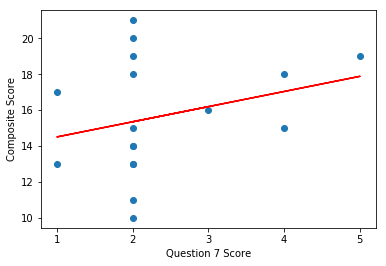

In [42]:
stats = linregress(x, y)
m = stats.slope
b = stats.intercept

plt.scatter(x, y)
plt.xticks([1,2,3,4,5])
plt.plot(x, m * x + b, color='red')
plt.ylabel('Composite Score')
plt.xlabel('Question 7 Score')
plt.show()

## Discussion
This study aimed to create a new composite measure of restfulness through a questionnaire with six 5-point Likert scale items. However, the reliability of the measure as calculated using Cronbach's alpha and the criterion-related concurrent validity were both lacking. These limited results show that this questionnaire should not be considered a valid measure of restfulness in its current form. Future research should more comprehensively examine which factors of sleep behavior better indicate one's degree of restfulness in order to improve the measure.

## References
Amaral, A. P., Soares, M. J., Pinto, A. M., Pereira, A. T., Madeira, N., Bos, S. C., Marques, M., Roque, C., Macedo, A. (2018). Sleep difficulties in college students: The role of stress, affect and cognitive processes. *Psychiatry Research*, *260*, 331-337. doi:10.1016/j.psychres.2017.11.072

Buboltz, W. C., Brown, F. C., Soper, B. (2001). Sleep Habits and Patterns of College Students: A Preliminary Study. *Journal of American College Health*, *50*(3), 131-135. doi:10.1080/07448480109596017

Kang, J., Chen, S. (2009). Effects of an irregular bedtime schedule on sleep quality, daytime sleepiness, and fatigue among university students in Taiwan. *BMC Public Health*, *9*, 248. doi:10.1186/1471-2458-9-248

Phillips, A. J. K., Clerx, W. M., O'Brien, C. S., Sano, A., Barger, L. K., Picard, R. W., Lockley, S. W., Klerman, E. B., Czeisler, C. A. (2017). Irregular sleep/wake patterns are associated with poorer academic performance and delayed circadian and sleep/wake timing. *Scientific Reports*, *7*, 3216. doi:10.1038/2Fs41598-017-03171-4